In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="deep")

all_sheets = pd.read_excel("marks_dataset.xlsx", sheet_name=None)

sheet_names = list(all_sheets.keys())
sheet_names


['1', '2', '3', '4', '5', '6']

In [25]:
for name, df in all_sheets.items():
    print("\n------ Sheet:", name, "------")
    print("Shape:", df.shape)
    print(df.head())
    print(df.describe(include='all'))



------ Sheet: 1 ------
Shape: (37, 21)
   Unnamed: 0   As:1  As:2  As:3  As:4   As:5  As:6  Qz:1  Qz:2  Qz:3  ...  \
0  Weightage:    3.0   3.0   3.0   3.0    3.0   3.0   2.0   2.0   2.0  ...   
1       Total  130.0  70.0  90.0  50.0  120.0  90.0   5.0  15.0  10.0  ...   
2        Sr.#    NaN   NaN   NaN   NaN    NaN   NaN   NaN   NaN   NaN  ...   
3           1   80.5  60.5  73.5  40.5   59.0  70.5   3.5   5.0   2.0  ...   
4           2   72.5  68.0  39.0  35.0   80.5  71.0   2.5   7.0   0.0  ...   

   Qz:5  Qz:6  Qz:7  Qz:8  S-I:1    S-I  S-II:1   S-II  Final:1  Final  
0   2.0   2.0   2.0   2.0   15.0  15.00   15.00  15.00    45.00  45.00  
1  10.0   5.0  12.0   2.0   40.0    NaN   40.00    NaN   100.00    NaN  
2   NaN   NaN   NaN   NaN    NaN    NaN     NaN    NaN      NaN    NaN  
3   NaN   2.5   9.0   2.0   17.5   6.56    6.25   2.34    35.75  16.08  
4   7.0   5.0  10.0   2.0   12.5   4.68   11.00   4.12    53.50  24.07  

[5 rows x 21 columns]
        Unnamed: 0        As:1

In [26]:
for name, df in all_sheets.items():
    numeric_cols = df.select_dtypes(include=['float', 'int']).columns
    df[numeric_cols] = df[numeric_cols].fillna(0)


In [27]:
# List of required columns
keep_cols = [
    "As:1","As:2","As:3","As:4","As:5","As:6",
    "Qz:1","Qz:2","Qz:3","Qz:4","Qz:5","Qz:6","Qz:7","Qz:8",
    "S-I","S-II","Final"
]

clean_sheets = {}

for name, df in all_sheets.items():
    available_cols = [c for c in keep_cols if c in df.columns]

    cleaned_df = df[available_cols].copy()

    clean_sheets[name] = cleaned_df

    print(f"\n{name} -> kept {len(available_cols)} columns:")
    print(available_cols)



1 -> kept 17 columns:
['As:1', 'As:2', 'As:3', 'As:4', 'As:5', 'As:6', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7', 'Qz:8', 'S-I', 'S-II', 'Final']

2 -> kept 17 columns:
['As:1', 'As:2', 'As:3', 'As:4', 'As:5', 'As:6', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7', 'Qz:8', 'S-I', 'S-II', 'Final']

3 -> kept 15 columns:
['As:1', 'As:2', 'As:3', 'As:4', 'As:5', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7', 'S-I', 'S-II', 'Final']

4 -> kept 15 columns:
['As:1', 'As:2', 'As:3', 'As:4', 'As:5', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7', 'S-I', 'S-II', 'Final']

5 -> kept 13 columns:
['As:1', 'As:2', 'As:3', 'As:4', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'S-I', 'S-II', 'Final']

6 -> kept 13 columns:
['As:1', 'As:2', 'As:3', 'As:4', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'S-I', 'S-II', 'Final']


In [28]:
processed_sheets = {}

for name, df in clean_sheets.items():

    # Identify assignment and quiz columns
    as_cols = [c for c in df.columns if c.startswith("As:")]
    qz_cols = [c for c in df.columns if c.startswith("Qz:")]

    # --- Calculate averages ---
    df["Assignment_Avg"] = df[as_cols].mean(axis=1)
    df["Quiz_Avg"] = df[qz_cols].mean(axis=1)

    # --- Drop the original assignment & quiz columns ---
    df = df.drop(columns=as_cols + qz_cols)

    processed_sheets[name] = df

    print(f"\n{name}:")
    print("Assignments:", as_cols)
    print("Quizzes:", qz_cols)
    print("New Columns:", df.columns.tolist())



1:
Assignments: ['As:1', 'As:2', 'As:3', 'As:4', 'As:5', 'As:6']
Quizzes: ['Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7', 'Qz:8']
New Columns: ['S-I', 'S-II', 'Final', 'Assignment_Avg', 'Quiz_Avg']

2:
Assignments: ['As:1', 'As:2', 'As:3', 'As:4', 'As:5', 'As:6']
Quizzes: ['Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7', 'Qz:8']
New Columns: ['S-I', 'S-II', 'Final', 'Assignment_Avg', 'Quiz_Avg']

3:
Assignments: ['As:1', 'As:2', 'As:3', 'As:4', 'As:5']
Quizzes: ['Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7']
New Columns: ['S-I', 'S-II', 'Final', 'Assignment_Avg', 'Quiz_Avg']

4:
Assignments: ['As:1', 'As:2', 'As:3', 'As:4', 'As:5']
Quizzes: ['Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'Qz:7']
New Columns: ['S-I', 'S-II', 'Final', 'Assignment_Avg', 'Quiz_Avg']

5:
Assignments: ['As:1', 'As:2', 'As:3', 'As:4']
Quizzes: ['Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6']
New Columns: ['S-I', 'S-II', 'Final', 'Assignment_Avg', 'Quiz_Avg']

6:
Assignments: ['As:1'

In [29]:
for name, df in processed_sheets.items():
    print(name, "-> shape:", df.shape)
    print(df.head(30))
    print("\n")


1 -> shape: (37, 5)
      S-I   S-II  Final  Assignment_Avg  Quiz_Avg
0   15.00  15.00  45.00        3.000000    2.0000
1    0.00   0.00   0.00       91.666667    8.6250
2    0.00   0.00   0.00        0.000000    0.0000
3    6.56   2.34  16.08       64.083333    4.0000
4    4.68   4.12  24.07       61.000000    5.4375
5    3.56   2.43  14.62       63.666667    3.1250
6    6.93   3.37  12.60       29.416667    1.3750
7   10.68   6.56  33.63       83.083333    7.2500
8    3.93   1.50  17.77       41.083333    3.5625
9    8.53   5.15  31.72       84.000000    7.0625
10   2.43   1.87   5.96       27.500000    1.5625
11   5.25   9.09  26.21       77.416667    3.3750
12   3.37   1.78  12.48       61.916667    1.5625
13   5.53   6.56  27.22       48.166667    6.4375
14   5.81   2.34  18.00       70.583333    2.5000
15   6.93   6.09  21.37       55.833333    2.0625
16   5.25   2.15  20.58       63.416667    2.6875
17   5.62   1.87  21.26       67.583333    2.7500
18   5.81   5.25  27.56       

In [30]:
for name, df in processed_sheets.items():
    print("\nEDA Summary for Sheet:", name)
    print(df.describe())



EDA Summary for Sheet: 1
             S-I       S-II      Final  Assignment_Avg   Quiz_Avg
count  37.000000  37.000000  37.000000       37.000000  37.000000
mean    5.988649   4.311081  19.744324       57.060811   3.533784
std     2.909171   3.206935   9.443714       20.100612   1.962960
min     0.000000   0.000000   0.000000        0.000000   0.000000
25%     4.400000   1.870000  14.620000       49.666667   2.062500
50%     5.530000   4.120000  20.020000       61.833333   3.312500
75%     7.120000   6.370000  26.430000       66.333333   4.250000
max    15.000000  15.000000  45.000000       91.666667   8.625000

EDA Summary for Sheet: 2
             S-I       S-II      Final  Assignment_Avg   Quiz_Avg
count  31.000000  31.000000  31.000000       31.000000  31.000000
mean    6.114194   4.895484  18.682258       55.476344   3.326613
std     3.514618   3.690295   9.867911       22.884583   1.778833
min     0.000000   0.000000   0.000000        0.000000   0.000000
25%     4.450000   2.430

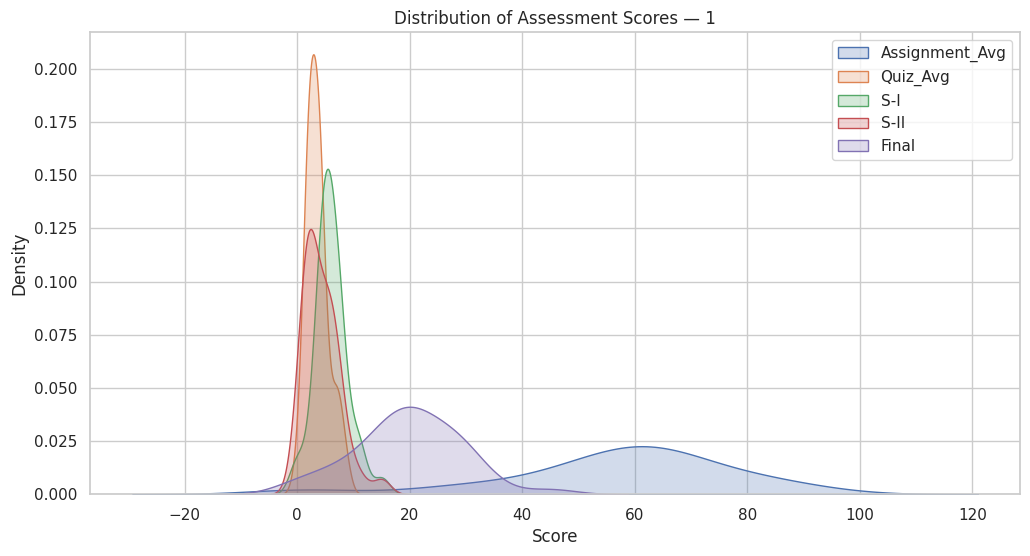

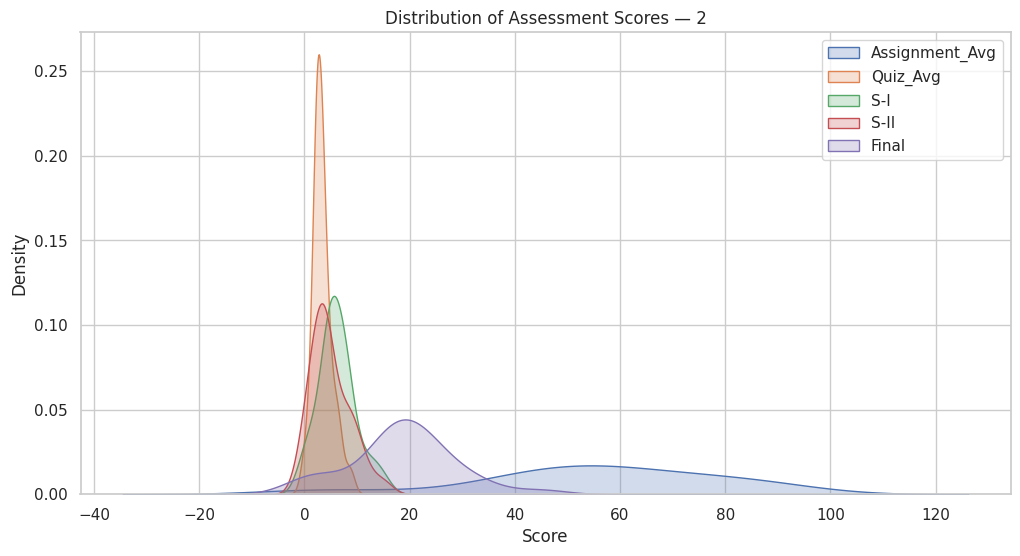

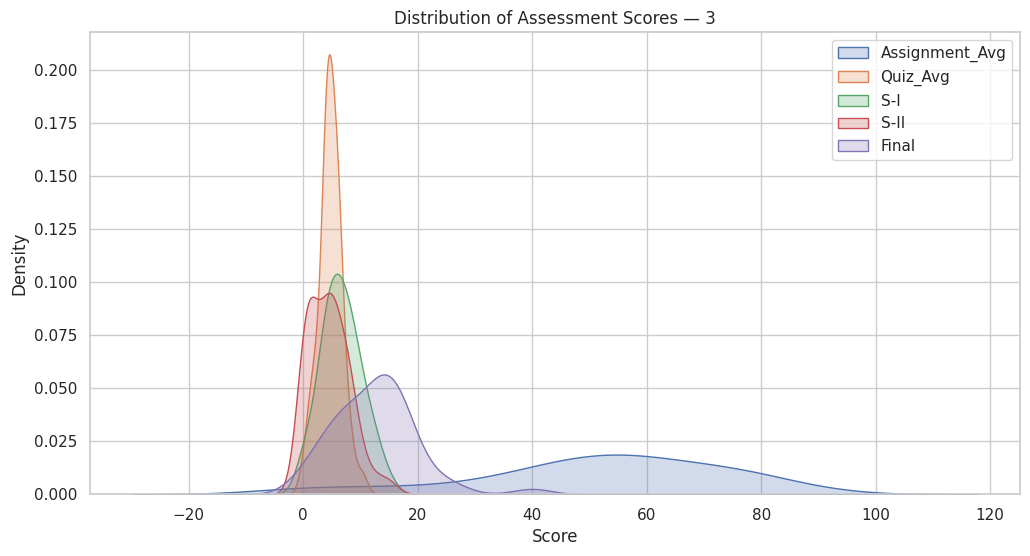

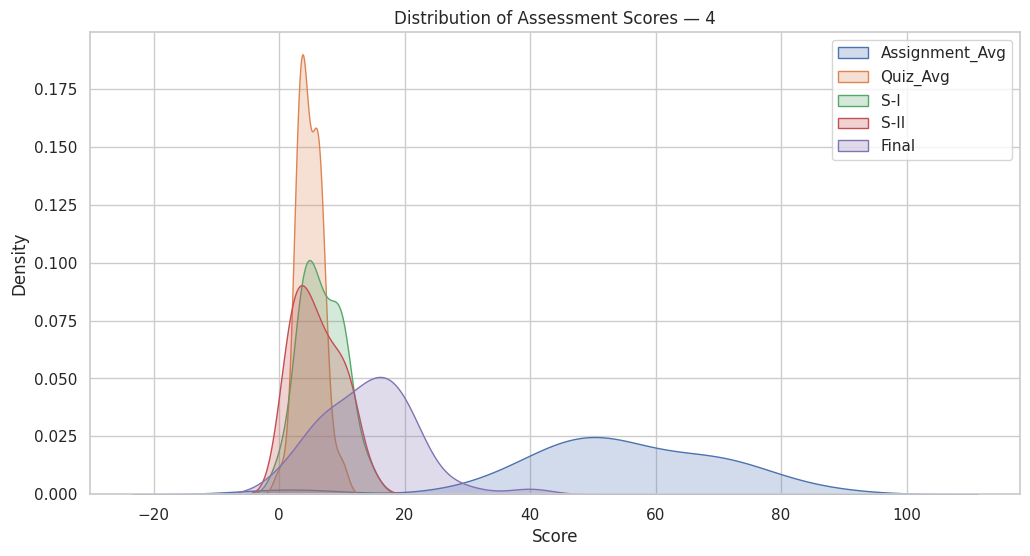

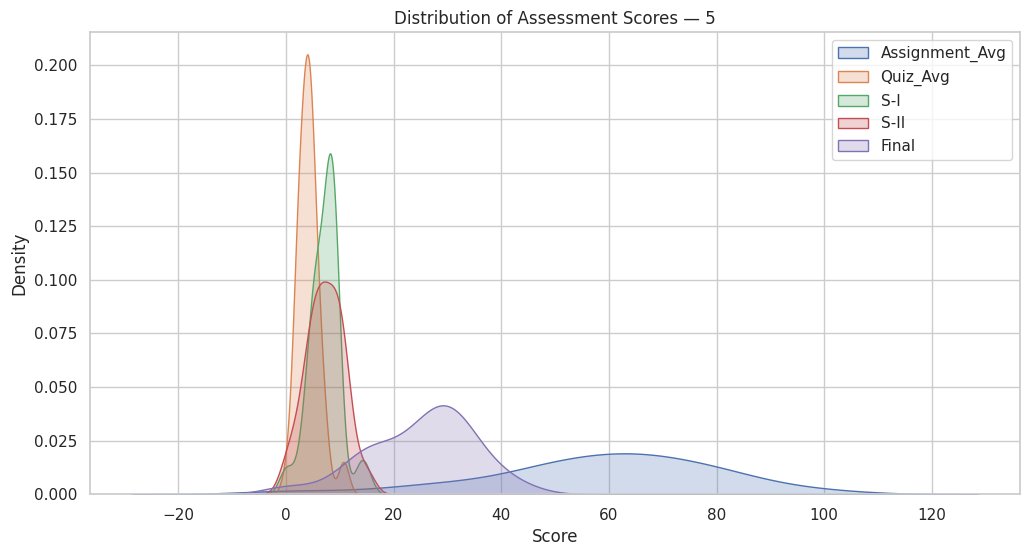

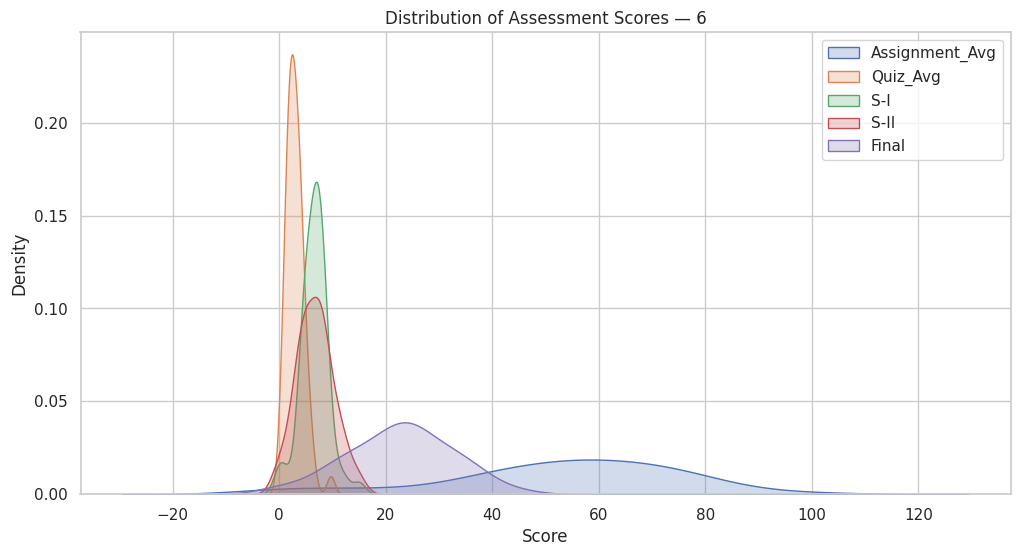

In [31]:
sns.set(style="whitegrid")

for name, df in processed_sheets.items():
    plt.figure(figsize=(12, 6))

    for col in ["Assignment_Avg", "Quiz_Avg", "S-I", "S-II", "Final"]:
        if col in df.columns:
            sns.kdeplot(df[col], label=col, fill=True)

    plt.title(f"Distribution of Assessment Scores — {name}")
    plt.xlabel("Score")
    plt.ylabel("Density")
    plt.legend()
    plt.show()


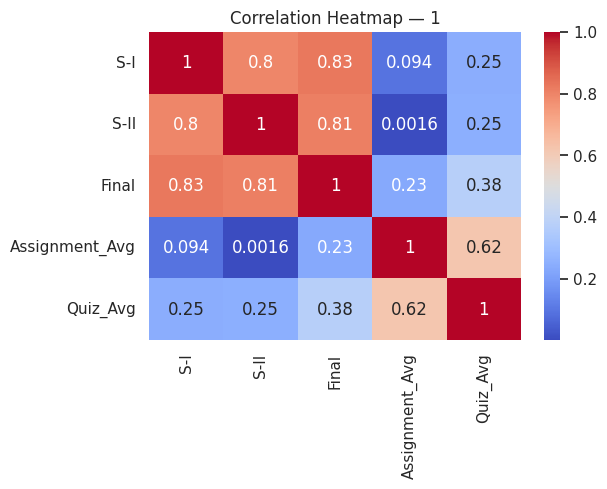

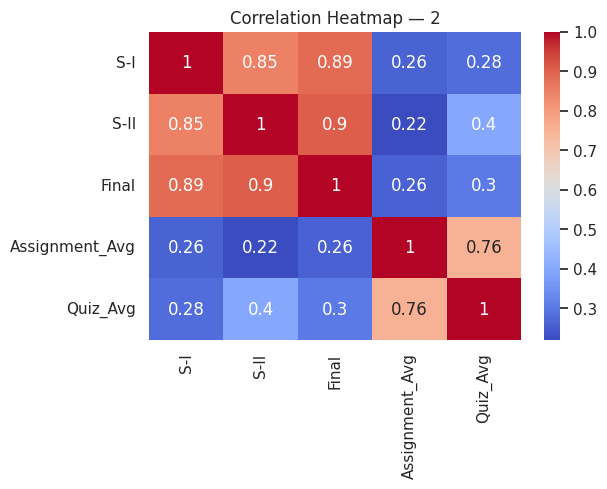

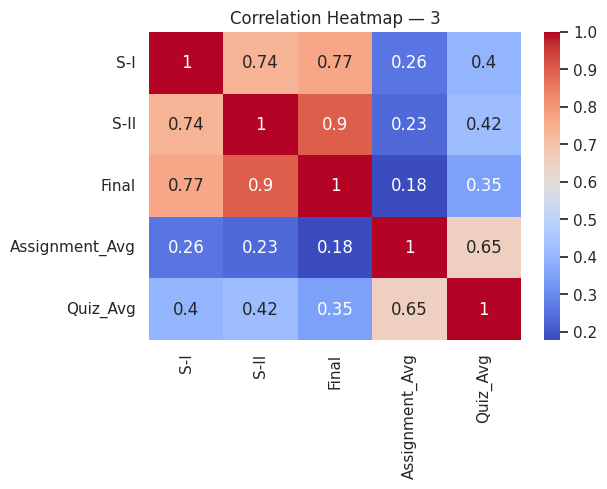

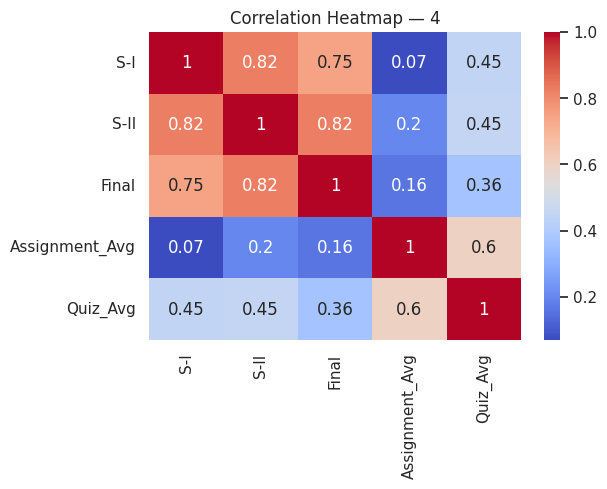

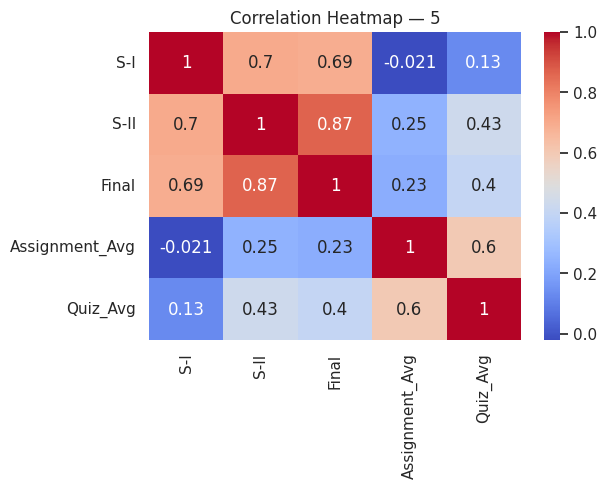

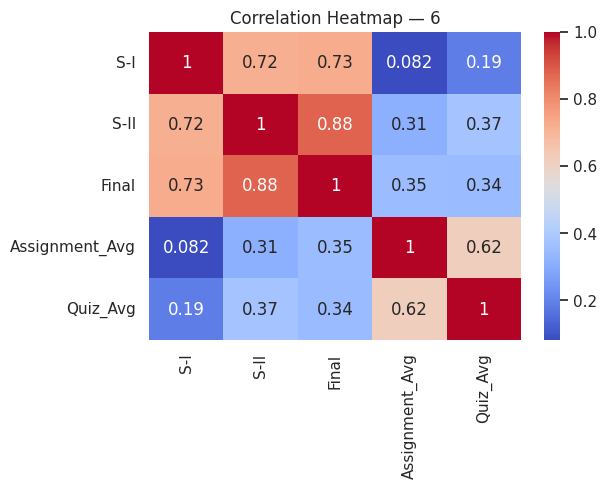

In [32]:
for name, df in processed_sheets.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
    plt.title(f"Correlation Heatmap — {name}")
    plt.show()


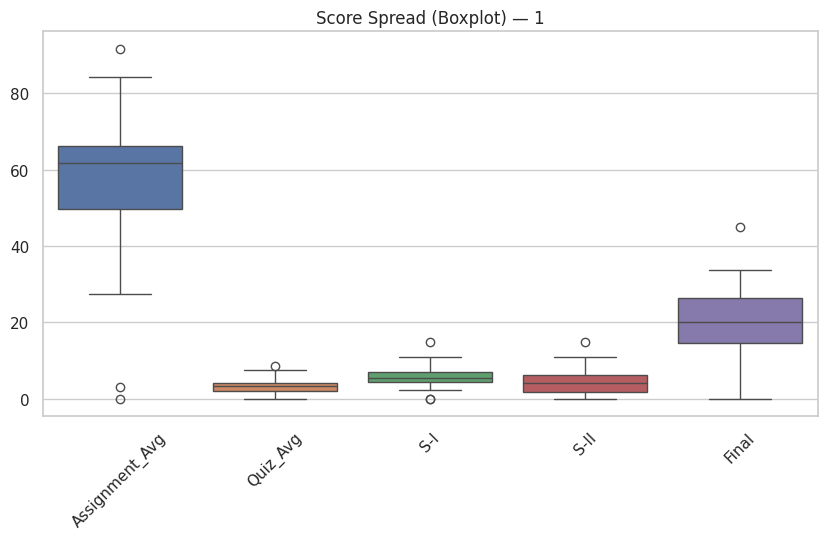

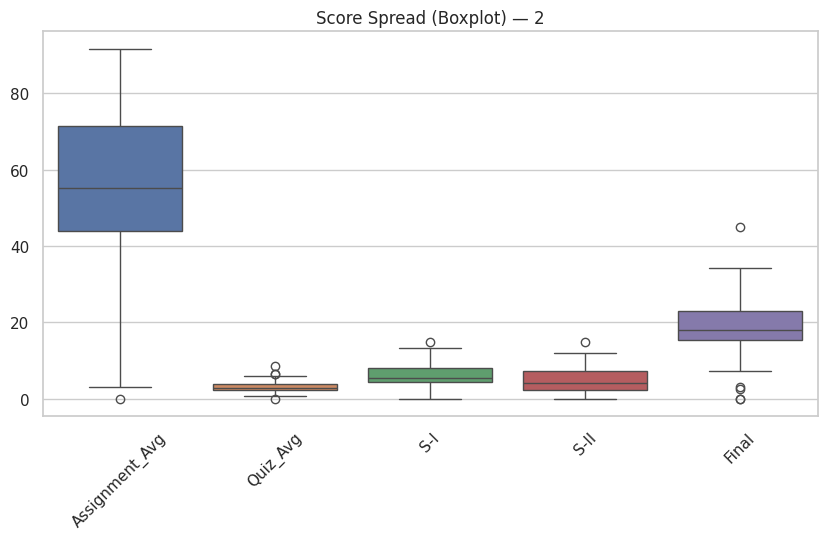

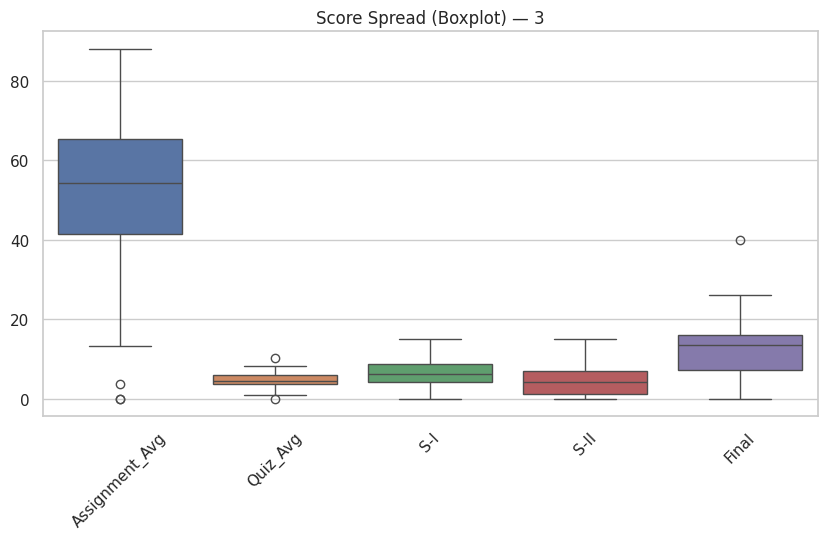

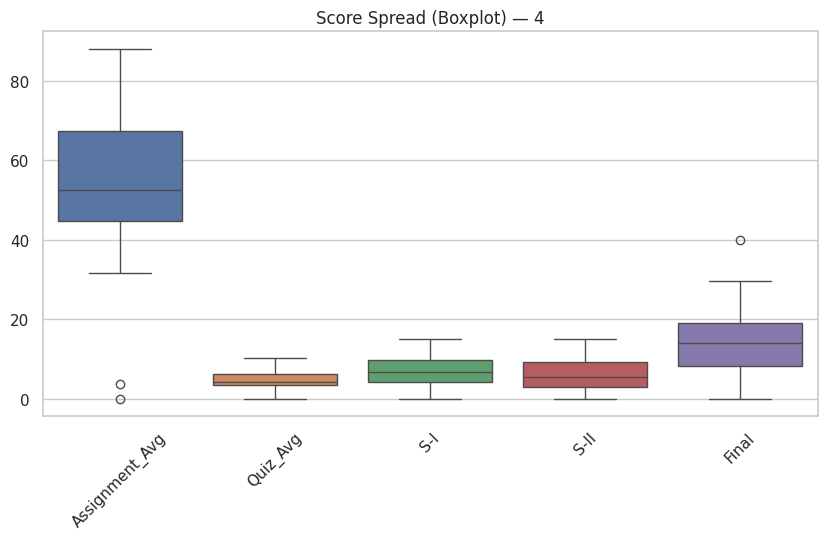

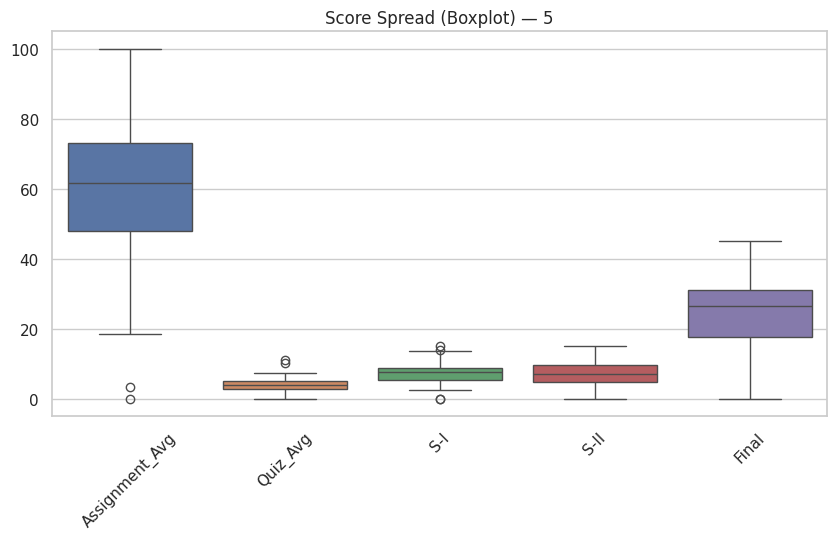

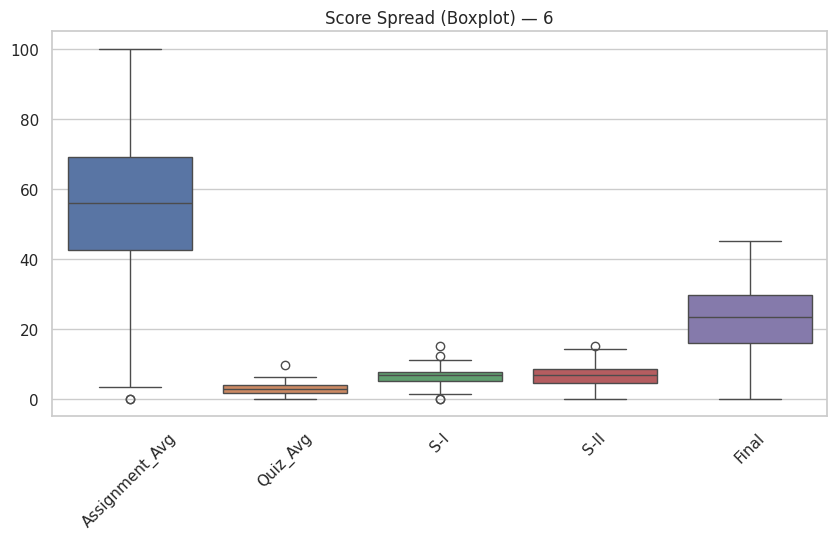

In [33]:
for name, df in processed_sheets.items():
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df[["Assignment_Avg", "Quiz_Avg", "S-I", "S-II", "Final"]])
    plt.title(f"Score Spread (Boxplot) — {name}")
    plt.xticks(rotation=45)
    plt.show()


In [34]:
combined = pd.concat(processed_sheets.values(), ignore_index=True)
print("\nCombined dataset shape:", combined.shape)
print(combined.columns.tolist())
# Quick look
display(combined.head(50))



Combined dataset shape: (272, 5)
['S-I', 'S-II', 'Final', 'Assignment_Avg', 'Quiz_Avg']


,S-I,S-II,Final,Assignment_Avg,Quiz_Avg
0,15.00,15.00,45.00,3.000000,2.0000
1,0.00,0.00,0.00,91.666667,8.6250
2,0.00,0.00,0.00,0.000000,0.0000
3,6.56,2.34,16.08,64.083333,4.0000
4,4.68,4.12,24.07,61.000000,5.4375
5,3.56,2.43,14.62,63.666667,3.1250
6,6.93,3.37,12.60,29.416667,1.3750
7,10.68,6.56,33.63,83.083333,7.2500
8,3.93,1.50,17.77,41.083333,3.5625
9,8.53,5.15,31.72,84.000000,7.0625


In [35]:

def prepare_dataset_for_target(df, target):
    """
    target: 'S-I' or 'S-II' or 'Final'
    Returns X, y (pandas) and a description of features used (domain-aware).
    Domain rules:
      - Predict S-I: allowed features = Assignment_Avg, Quiz_Avg
      - Predict S-II: allowed features = Assignment_Avg, Quiz_Avg, S-I
      - Predict Final: allowed features = Assignment_Avg, Quiz_Avg, S-I, S-II
    Rows with missing target are dropped.
    """
    df_local = df.copy()
    # define allowed features
    if target == "S-I":
        features = ["Assignment_Avg", "Quiz_Avg"]
    elif target == "S-II":
        features = ["Assignment_Avg", "Quiz_Avg", "S-I"]
    elif target == "Final":
        features = ["Assignment_Avg", "Quiz_Avg", "S-I", "S-II"]
    else:
        raise ValueError("Unknown target")

    # keep only relevant columns + target
    need_cols = [c for c in features + [target] if c in df_local.columns]
    df_local = df_local[need_cols].copy()

    # drop rows where target is missing
    df_local = df_local.dropna(subset=[target]).reset_index(drop=True)
    # Note: features may contain NaN — we will impute after splitting into train/test to avoid leakage
    return df_local, features


In [36]:
from sklearn.base import clone
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

import random
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

def evaluate_model_on_test(model, X_train, X_test, y_train, y_test):
    """
    Fit model on X_train,y_train and evaluate on X_test.
    Returns dict of metrics and fitted model.
    """
    m = clone(model)
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return {"model": m, "mae": mae, "rmse": rmse, "r2": r2, "y_pred": y_pred}
def bootstrap_mae_CI(model_pipeline, X_train, y_train, n_boot=500, random_state=RANDOM_STATE):
    """
    Perform bootstrap on the TRAIN data only.
    For each bootstrap sample:
      - sample with replacement from train indices -> create bootstrap sample
      - identify OOB indices (train indices not in bootstrap sample)
      - fit model on bootstrap sample, evaluate MAE on OOB set (if any)
    Collect MAE values across bootstrap iterations and return 95% CI percentiles (2.5, 97.5)
    Returns: dict with 'mae_mean', 'mae_std', 'ci_lower', 'ci_upper', 'mae_list'
    """
    n = X_train.shape[0]
    if n < 2:
        return {"mae_mean": np.nan, "mae_std": np.nan, "ci_lower": np.nan, "ci_upper": np.nan, "mae_list": []}

    maes = []
    rng = np.random.RandomState(random_state)
    all_indices = np.arange(n)

    for i in range(n_boot):
        # sample indices with replacement
        boot_idx = rng.choice(all_indices, size=n, replace=True)
        oob_idx = np.setdiff1d(all_indices, np.unique(boot_idx))
        if len(oob_idx) == 0:
            # no OOB samples — skip this iteration
            continue

        X_boot = X_train.iloc[boot_idx]
        y_boot = y_train.iloc[boot_idx]
        X_oob = X_train.iloc[oob_idx]
        y_oob = y_train.iloc[oob_idx]

        model_clone = clone(model_pipeline)
        # fit on bootstrap
        model_clone.fit(X_boot, y_boot)
        # predict on OOB
        y_oob_pred = model_clone.predict(X_oob)
        mae_oob = mean_absolute_error(y_oob, y_oob_pred)
        maes.append(mae_oob)

    if len(maes) == 0:
        return {"mae_mean": np.nan, "mae_std": np.nan, "ci_lower": np.nan, "ci_upper": np.nan, "mae_list": maes}

    ci_lower = np.percentile(maes, 2.5)
    ci_upper = np.percentile(maes, 97.5)
    return {"mae_mean": np.mean(maes), "mae_std": np.std(maes, ddof=1), "ci_lower": ci_lower, "ci_upper": ci_upper, "mae_list": maes}


In [37]:
from sklearn.impute import SimpleImputer

def run_RQ_experiments(df_combined, target, test_size=0.2, random_state=RANDOM_STATE, n_boot=500):
    """
    Runs experiments for a given target (S-I, S-II, Final).
    Trains: LinearRegression (multiple), Polynomial regression (degree 2 pipeline), DummyRegressor (mean).
    Returns a results DataFrame (models x metrics) and stores fitted best pipeline for train/test inspection.
    """
    df_local, allowed_features = prepare_dataset_for_target(df_combined, target)
    print(f"\n=== Running experiments for target: {target} ===")
    print("Allowed features:", allowed_features)
    print("Total rows after dropping missing target:", df_local.shape[0])

    # drop rows where ALL features are NA (can't use)
    df_local = df_local.dropna(axis=0, how='all', subset=allowed_features).reset_index(drop=True)
    # split into X,y
    X = df_local[allowed_features].copy()
    y = df_local[target].copy()

    # train-test split (stratify not needed — regression)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Imputation: fit imputer on train only to avoid leakage
    imputer = SimpleImputer(strategy="mean")
    imputer.fit(X_train)
    X_train_imputed = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns, index=X_train.index)
    X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

    # Define pipelines:
    # - Multiple Linear Regression (with standard scaler)
    lr_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("lr", LinearRegression())
    ])

    # - Polynomial Regression degree 2: PolynomialFeatures -> StandardScaler -> LinearRegression
    poly_pipe = Pipeline([
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
        ("lr", LinearRegression())
    ])

    # - Dummy Regressor (baseline)
    dummy = DummyRegressor(strategy="mean")

    # Train & evaluate models on test set
    results = []
    models = [("LinearRegression", lr_pipe), ("PolynomialDeg2", poly_pipe), ("DummyMean", dummy)]

    for name_model, model in models:
        # Fit on training data
        res = evaluate_model_on_test(model, X_train_imputed, X_test_imputed, y_train, y_test)
        # Bootstrap MAE CI using the pipeline fit process (note: use imputed train data here)
        # For bootstrap we should use a pipeline that includes imputer; but we already imputed using train-only mean.
        # To remain consistent, we will bootstrap using the imputed X_train_imputed, y_train.
        ci_info = bootstrap_mae_CI(model, X_train_imputed, y_train, n_boot=n_boot, random_state=random_state)
        results.append({
            "target": target,
            "model_name": name_model,
            "mae_test": res["mae"],
            "rmse_test": res["rmse"],
            "r2_test": res["r2"],
            "mae_boot_mean_train": ci_info["mae_mean"],
            "mae_boot_std_train": ci_info["mae_std"],
            "mae_95ci_lower": ci_info["ci_lower"],
            "mae_95ci_upper": ci_info["ci_upper"],
            "fitted_model": res["model"],
            "y_test_preds": res["y_pred"],
            "X_train_imputed": X_train_imputed,  # keep for analysis for best model later
            "X_test_imputed": X_test_imputed,
            "y_train": y_train,
            "y_test": y_test
        })

    # Prepare results DataFrame (exclude fitted objects for table)
    results_df = pd.DataFrame([{
        "target": r["target"],
        "model_name": r["model_name"],
        "mae_test": r["mae_test"],
        "rmse_test": r["rmse_test"],
        "r2_test": r["r2_test"],
        "mae_boot_mean_train": r["mae_boot_mean_train"],
        "mae_boot_std_train": r["mae_boot_std_train"],
        "mae_95ci_lower": r["mae_95ci_lower"],
        "mae_95ci_upper": r["mae_95ci_upper"],
    } for r in results])

    return results_df, results


In [38]:
results_RQ1_df, results_RQ1 = run_RQ_experiments(combined, target="S-I", test_size=0.2, n_boot=500)
results_RQ2_df, results_RQ2 = run_RQ_experiments(combined, target="S-II", test_size=0.2, n_boot=500)
results_RQ3_df, results_RQ3 = run_RQ_experiments(combined, target="Final", test_size=0.2, n_boot=500)

print("\n--- RQ1 results (predict S-I) ---")
display(results_RQ1_df.sort_values("mae_test"))

print("\n--- RQ2 results (predict S-II) ---")
display(results_RQ2_df.sort_values("mae_test"))

print("\n--- RQ3 results (predict Final) ---")
display(results_RQ3_df.sort_values("mae_test"))


=== Running experiments for target: S-I ===
Allowed features: ['Assignment_Avg', 'Quiz_Avg']
Total rows after dropping missing target: 272

=== Running experiments for target: S-II ===
Allowed features: ['Assignment_Avg', 'Quiz_Avg', 'S-I']
Total rows after dropping missing target: 272

=== Running experiments for target: Final ===
Allowed features: ['Assignment_Avg', 'Quiz_Avg', 'S-I', 'S-II']
Total rows after dropping missing target: 272

--- RQ1 results (predict S-I) ---


,target,model_name,mae_test,rmse_test,r2_test,mae_boot_mean_train,mae_boot_std_train,mae_95ci_lower,mae_95ci_upper
1,S-I,PolynomialDeg2,2.400428,3.090320,0.014467,2.102984,0.169302,1.798721,2.458719
0,S-I,LinearRegression,2.422183,3.460729,-0.235946,2.159571,0.174354,1.833212,2.511345
2,S-I,DummyMean,2.667191,3.395359,-0.189695,2.394085,0.169067,2.074713,2.745439



--- RQ2 results (predict S-II) ---


,target,model_name,mae_test,rmse_test,r2_test,mae_boot_mean_train,mae_boot_std_train,mae_95ci_lower,mae_95ci_upper
1,S-II,PolynomialDeg2,1.854517,2.268777,0.632909,1.977666,0.149933,1.735709,2.329224
0,S-II,LinearRegression,1.980469,2.299242,0.622984,1.984598,0.129495,1.738444,2.269349
2,S-II,DummyMean,3.081879,3.831951,-0.047201,3.032039,0.191182,2.653831,3.399208



--- RQ3 results (predict Final) ---


,target,model_name,mae_test,rmse_test,r2_test,mae_boot_mean_train,mae_boot_std_train,mae_95ci_lower,mae_95ci_upper
0,Final,LinearRegression,4.885958,6.499026,0.551318,4.315944,0.277103,3.753460,4.875410
1,Final,PolynomialDeg2,5.247343,6.443983,0.558886,4.411067,0.330480,3.849121,5.104171
2,Final,DummyMean,8.148515,10.091073,-0.081725,8.107506,0.549792,7.025411,9.157575


In [39]:
def show_train_test_for_best(results_list):
    # results_list contains dict entries from run_RQ_experiments
    best = min(results_list, key=lambda x: x["mae_test"])
    model = best["fitted_model"]
    X_train = best["X_train_imputed"]
    X_test = best["X_test_imputed"]
    y_train = best["y_train"]
    y_test = best["y_test"]
    # predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"\nBest model for target {best['target']}: {best['model_name']}")
    print(f"TRAIN -> MAE: {train_mae:.4f}, RMSE: {train_rmse:.4f}, R2: {train_r2:.4f}")
    print(f" TEST -> MAE: {test_mae:.4f}, RMSE: {test_rmse:.4f}, R2: {test_r2:.4f}")
    return best

In [40]:
print("\n--- Best Model for S-I ---")
best_rq1 = show_train_test_for_best(results_RQ1)

print("\n--- Best Model for S-II ---")
best_rq2 = show_train_test_for_best(results_RQ2)

print("\n--- Best Model for Final ---")
best_rq3 = show_train_test_for_best(results_RQ3)


--- Best Model for S-I ---

Best model for target S-I: PolynomialDeg2
TRAIN -> MAE: 1.9768, RMSE: 2.6064, R2: 0.2685
 TEST -> MAE: 2.4004, RMSE: 3.0903, R2: 0.0145

--- Best Model for S-II ---

Best model for target S-II: PolynomialDeg2
TRAIN -> MAE: 1.8278, RMSE: 2.2890, R2: 0.6053
 TEST -> MAE: 1.8545, RMSE: 2.2688, R2: 0.6329

--- Best Model for Final ---

Best model for target Final: LinearRegression
TRAIN -> MAE: 4.1840, RMSE: 5.1384, R2: 0.7392
 TEST -> MAE: 4.8860, RMSE: 6.4990, R2: 0.5513


In [41]:
import pickle

print("\n=== Saving trained models ===")

# Save the best models
with open('/content/best_model_S-I.pkl', 'wb') as f:
    pickle.dump(best_rq1['fitted_model'], f)
    print("✓ Saved best model for S-I")

with open('/content/best_model_S-II.pkl', 'wb') as f:
    pickle.dump(best_rq2['fitted_model'], f)
    print("✓ Saved best model for S-II")

with open('/content/best_model_Final.pkl', 'wb') as f:
    pickle.dump(best_rq3['fitted_model'], f)
    print("✓ Saved best model for Final")

print("All models saved successfully!")


=== Saving trained models ===
✓ Saved best model for S-I
✓ Saved best model for S-II
✓ Saved best model for Final
All models saved successfully!


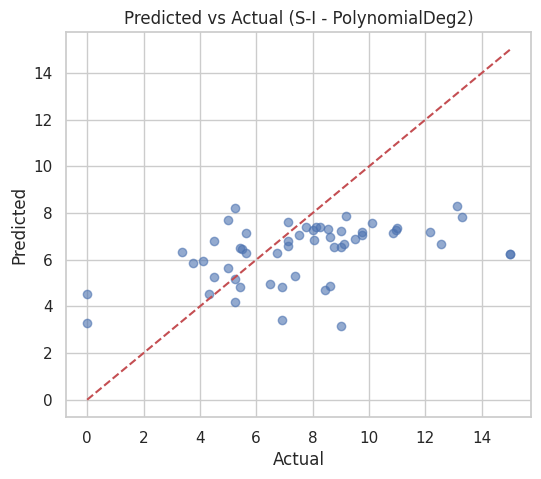

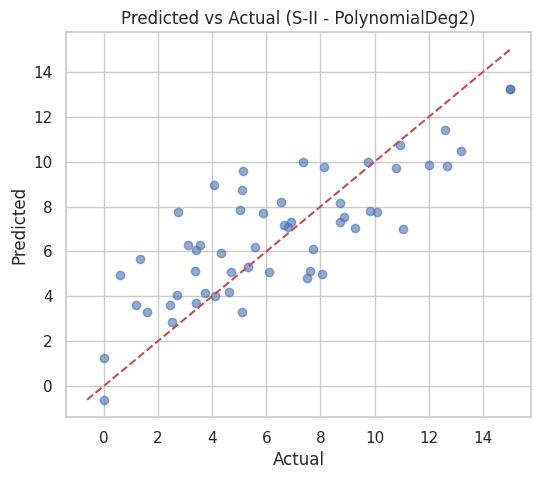

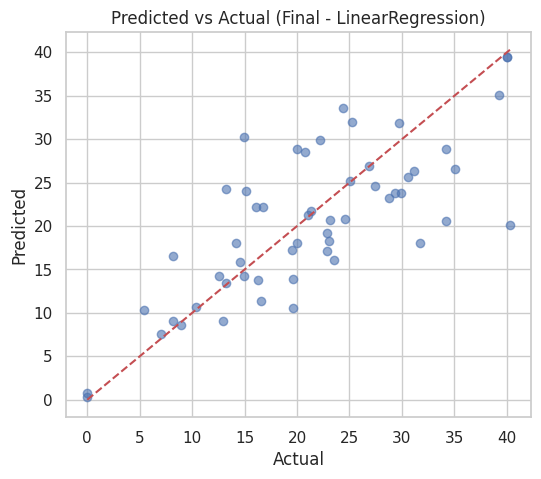

In [42]:
def plot_pred_vs_actual(best_result):
    model = best_result["fitted_model"]
    X_test = best_result["X_test_imputed"]
    y_test = best_result["y_test"]
    y_pred = best_result["y_test_preds"]

    plt.figure(figsize=(6,5))
    plt.scatter(y_test, y_pred, alpha=0.6)
    mn = min(y_test.min(), np.min(y_pred))
    mx = max(y_test.max(), np.max(y_pred))
    plt.plot([mn, mx], [mn, mx], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Predicted vs Actual ({best_result['target']} - {best_result['model_name']})")
    plt.show()

plot_pred_vs_actual(best_rq1)
plot_pred_vs_actual(best_rq2)
plot_pred_vs_actual(best_rq3)


In [43]:
results_RQ1_df.to_csv("results_RQ1.csv", index=False)
results_RQ2_df.to_csv("results_RQ2.csv", index=False)
results_RQ3_df.to_csv("results_RQ3.csv", index=False)

print("\nSaved results_RQ1.csv, results_RQ2.csv, results_RQ3.csv in workspace.")


Saved results_RQ1.csv, results_RQ2.csv, results_RQ3.csv in workspace.


In [44]:

# Create a workspace folder for the dashboard files (optional)
import os
os.makedirs('/content/colab_dash', exist_ok=True)
print("Workspace:", "/content/colab_dash")


Workspace: /content/colab_dash


In [45]:
!pip install gradio

import os
import pandas as pd
import gradio as gr
PATH = "/content"
def try_load(filename):
    full_path = f"{PATH}/{filename}"
    if os.path.exists(full_path):
        df = pd.read_csv(full_path)

        # clean column names
        df.columns = df.columns.str.strip()
        for col in df.select_dtypes(include="object").columns:
            df[col] = df[col].str.strip()

        return df
    else:
        print("File not found:", full_path)
        return None
df_rq1 = try_load("results_RQ1.csv")
df_rq2 = try_load("results_RQ2.csv")
df_rq3 = try_load("results_RQ3.csv")

all_data = {
    "S-I": df_rq1,
    "S-II": df_rq2,
    "Final": df_rq3
}

import plotly.graph_objects as go

def show_results(target, model_name):
    df = all_data[target]

    # If dataset missing
    if df is None:
        return pd.DataFrame({"Error": ["Dataset not loaded"]}), go.Figure()

    filtered = df[df["model_name"] == model_name]

    # If model not found
    if filtered.empty:
        return pd.DataFrame({"Error": ["Model not found in dataset"]}), go.Figure()

    metrics = ["mae_test", "rmse_test", "r2_test"]

    # Extract values for plot
    values = filtered.iloc[0][metrics].tolist()

    fig = go.Figure(
        data=[go.Bar(x=metrics, y=values)],
        layout=go.Layout(
            title=f"Performance Metrics for {model_name} ({target})",
            xaxis_title="Metric",
            yaxis_title="Value"
        )
    )

    return filtered, fig
import gradio as gr

targets = ["S-I", "S-II", "Final"]
models = ["LinearRegression", "PolynomialDeg2", "DummyMean"]

with gr.Blocks() as demo:
    gr.Markdown("# 📊 Machine Learning Model Evaluation Dashboard")

    with gr.Row():
        t = gr.Dropdown(targets, label="Select Target (Dataset)")
        m = gr.Dropdown(models, label="Select Model")

    table = gr.DataFrame(label="Filtered Results")
    plot = gr.Plot(label="Performance Plot")

    t.change(show_results, [t, m], [table, plot])
    m.change(show_results, [t, m], [table, plot])

demo.launch(share=True, inline=False)



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f9002f7da7ec4cdf29.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [50]:

import gradio as gr
import plotly.graph_objects as go

# =========================
# Final Exam Prediction
# =========================

def predict_final_exam(assignment_avg, quiz_avg, s1_score, s2_score):
    try:
        X = pd.DataFrame({
            'Assignment_Avg': [assignment_avg],
            'Quiz_Avg': [quiz_avg],
            'S-I': [s1_score],
            'S-II': [s2_score]
        })

        prediction = model_final.predict(X)[0]
        prediction = max(0, min(100, prediction))

        fig = go.Figure()
        fig.add_trace(go.Indicator(
            mode="gauge+number",
            value=prediction,
            title={'text': "Predicted Final Exam Score"},
            gauge={
                'axis': {'range': [0, 100]},
                'bar': {'color': "darkred"},
                'steps': [
                    {'range': [0, 50], 'color': "lightgray"},
                    {'range': [50, 75], 'color': "gray"},
                    {'range': [75, 100], 'color': "lightgreen"}
                ],
            }
        ))

        interpretation = get_interpretation(prediction)
        recommendations = get_recommendations(
            assignment_avg, quiz_avg, s1_score, s2_score, prediction
        )

        return (
            f"### 🎯 Predicted Final Exam Score: **{prediction:.2f}/100**",
            interpretation,
            recommendations,
            fig
        )

    except Exception as e:
        return f"❌ Error: {str(e)}", "", "", go.Figure()


# =========================
# Interpretation
# =========================

def get_interpretation(score):
    if score >= 85:
        return "🌟 **Excellent!** You are well prepared for the final exam."
    elif score >= 70:
        return "✅ **Good performance.** A little more effort can boost your score."
    elif score >= 50:
        return "⚠️ **Average.** Focus on weak areas and practice more."
    else:
        return "🚨 **Needs improvement.** Revise basics and seek help."


# =========================
# Recommendations
# =========================

def get_recommendations(assignment_avg, quiz_avg, s1, s2, final_pred):
    recs = ["## 📚 Personalized Recommendations\n"]

    if assignment_avg < 60:
        recs.append("- 📝 Improve assignment quality and consistency.")
    if quiz_avg < 60:
        recs.append("- 📖 Practice quizzes regularly.")
    if s1 < 60:
        recs.append("- 📊 Revise Sessional-I topics thoroughly.")
    if s2 < 60:
        recs.append("- 📈 Strengthen Sessional-II concepts.")
    if final_pred < 70:
        recs.append("- 🎯 Make a focused final-exam study plan.")

    if len(recs) == 1:
        recs.append("- 🏆 Keep up the great work and stay consistent!")

    return "\n".join(recs)


# =========================
# Gradio Interface
# =========================

with gr.Blocks(theme=gr.themes.Soft(), title="Final Exam Prediction") as demo:

    gr.Markdown("""
    # 🎓 Final Exam Score Predictor
    Predict your **Final Exam marks** using your continuous assessment scores.
    """)

    with gr.Row():
        with gr.Column():
            assignment = gr.Slider(0, 100, value=75, label="Assignment Average (%)")
            quiz = gr.Slider(0, 100, value=70, label="Quiz Average (%)")
            s1 = gr.Slider(0, 100, value=65, label="Sessional-I Score (%)")
            s2 = gr.Slider(0, 100, value=68, label="Sessional-II Score (%)")

            predict_btn = gr.Button("🔮 Predict Final Exam Score", variant="primary")

        with gr.Column():
            result = gr.Markdown()
            interpretation = gr.Markdown()
            recommendations = gr.Markdown()
            plot = gr.Plot()

    predict_btn.click(
        predict_final_exam,
        inputs=[assignment, quiz, s1, s2],
        outputs=[result, interpretation, recommendations, plot]
    )

demo.launch(share=True)


/tmp/ipython-input-2574286963.py:95: UserWarning:

The parameters have been moved from the Blocks constructor to the launch() method in Gradio 6.0: theme. Please pass these parameters to launch() instead.



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f1595cb6cca0465795.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
